In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow.keras as keras
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
#split into training and testing
seed=12
np.random.seed(seed)

In [ ]:
DATASET_PATH = "C:/ML-Final-Project/data.json"

In [ ]:
def load_data(dataset_path):
    with open(dataset_path,"r") as fp:
        data = json.load(fp)

    #convert lists into numpy arrays
        inputs = np.array(data["mfcc"])
        targets = np.array(data["labels"])

        return inputs, targets


In [ ]:
#load data
inputs,targets = load_data(DATASET_PATH)
inputs

array([[[-2.42435989e+02,  1.02184860e+02, -9.91323471e+00, ...,
         -3.95323610e+00, -2.40564537e+00, -2.38090658e+00],
        [-2.12989746e+02,  1.03544777e+02, -1.08341732e+01, ...,
         -5.81353188e+00,  2.64356709e+00, -2.80662155e+00],
        [-1.95409332e+02,  1.04360657e+02, -1.85501546e-01, ...,
         -1.08171635e+01, -5.88806152e-01, -5.28410530e+00],
        ...,
        [-1.24157700e+02,  6.37352219e+01,  2.11729393e+01, ...,
         -1.65676613e+01,  1.37965155e+01, -2.31835365e+01],
        [-1.11283928e+02,  6.05447235e+01,  1.33710325e+00, ...,
         -1.22842140e+01,  1.48256054e+01, -1.58052368e+01],
        [-1.31811951e+02,  6.65644531e+01, -7.93185997e+00, ...,
         -8.66252136e+00,  1.16732750e+01, -8.72385788e+00]],

       [[-1.71760757e+02,  8.67187042e+01, -1.29779539e+01, ...,
         -7.98365927e+00,  3.68273497e+00, -4.20823431e+00],
        [-1.53283447e+02,  9.38014526e+01, -2.03874569e+01, ...,
         -7.75853252e+00,  8.76973343e

In [ ]:
inputs

In [ ]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=0.3) #30% for testing

In [ ]:
#netwokr architecture
model = keras.Sequential([
    #input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    #1st hidden layer
    keras.layers.Dense(512,activation="relu"),
    #2nd hidden layer
    keras.layers.Dense(256,activation="relu"),

    #3rd hidden layer
    keras.layers.Dense(64,activation="relu"),

    #output layer
    keras.layers.Dense(10,activation="softmax")     #ACTIVATION FUNCTION TO NORMALIZE PREDICITIONS
])

#above model doens't account for overfitting

In [ ]:
#compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics =["accuracy"])
model.summary()

In [ ]:
def plot_history(history):

    fig,axs = plt.subplots(2)

    #create accuracy subplots:
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    :return z : Mappings for data
    """

    # load data
    X, y, z = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test, z


In [ ]:
#train the network
history = model.fit(inputs_train,targets_train,validation_data=(inputs_test,targets_test),epochs=50,batch_size=32)

#plot the accuracy and error over epochs


In [ ]:
plot_history(history)

In [ ]:
#ACCOUNT FOR OVERFITTING
model2 = keras.Sequential([
    #input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),

    #1st hidden layer
    keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #2nd hidden layer
    keras.layers.Dense(256,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #3rd hidden layer
    keras.layers.Dense(64,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #output layer
    keras.layers.Dense(10,activation="softmax")     #ACTIVATION FUNCTION TO NORMALIZE PREDICITIONS
])

#compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics =["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

In [ ]:
history2 = model2.fit(inputs_train,targets_train,validation_data=(inputs_test,targets_test),epochs=50,batch_size=32)

Epoch 1/50
219/219 [==============================] - 2s 9ms/step - loss: 24.3435 - accuracy: 0.1548 - val_loss: 3.4727 - val_accuracy: 0.1879
Epoch 2/50
219/219 [==============================] - 2s 9ms/step - loss: 6.2468 - accuracy: 0.1346 - val_loss: 3.4950 - val_accuracy: 0.1265
Epoch 3/50
219/219 [==============================] - 2s 8ms/step - loss: 4.3455 - accuracy: 0.1259 - val_loss: 3.5054 - val_accuracy: 0.1145
Epoch 4/50
219/219 [==============================] - 2s 8ms/step - loss: 3.8442 - accuracy: 0.1213 - val_loss: 3.4946 - val_accuracy: 0.1218
Epoch 5/50
219/219 [==============================] - 2s 8ms/step - loss: 3.7034 - accuracy: 0.1286 - val_loss: 3.4867 - val_accuracy: 0.1238
Epoch 6/50
219/219 [==============================] - 2s 9ms/step - loss: 3.6300 - accuracy: 0.1230 - val_loss: 3.4833 - val_accuracy: 0.1215
Epoch 7/50
219/219 [==============================] - 2s 9ms/step - loss: 3.5542 - accuracy: 0.1338 - val_loss: 3.4468 - val_accuracy: 0.1505
Epoch

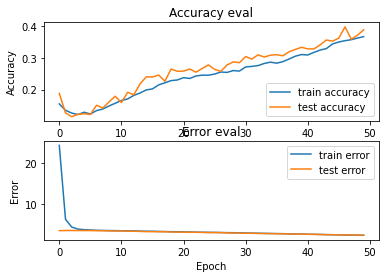

In [ ]:
plot_history(history2)

In [ ]:
###BUILDING A CNN

In [ ]:
def prepare_datasets(test_size,validation_size):
    X,y = load_data(DATASET_PATH)

    #split into train and test sets
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)

    #create train/validation split
    X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=validation_size)

    #3d-array expected  ->1 channel only
    X_train = X_train[...,np.newaxis]
    X_validation = X_validation[...,np.newaxis]
    X_test = X_test[...,np.newaxis]

    return X_train, X_validation, X_test, y_train,y_validation,y_test

In [ ]:
X_train, X_validation, X_test, y_train,y_validation,y_test = prepare_datasets(0.25,0.2)
X_train.ndim

4

In [ ]:
def build_model(input_shape):
    #create model
    model = keras.Sequential()

    #1st conv layer
    model.add(keras.layers.Conv2D(128,(2,2),activation='relu',input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    #2nd conv layer
    model.add(keras.layers.Conv2D(64,(2,2),activation='relu',input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    #3rd conv layer
    model.add(keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())

    #flatten output and feed to dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    #output layer
    model.add(keras.layers.Dense(10,activation='softmax'))

    return model

In [ ]:
#Building the CNN
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3]) #X_train is a 4D array
model3= build_model(input_shape)

#compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics =["accuracy"])

#train the model
model3.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=30)


#evaluate CNN on test ste
test_error,test_accuracy = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is:{}".format(test_accuracy))


Epoch 1/30
188/188 [==============================] - 17s 90ms/step - loss: 2.3570 - accuracy: 0.2277 - val_loss: 1.8208 - val_accuracy: 0.3558
Epoch 2/30
188/188 [==============================] - 16s 88ms/step - loss: 1.8067 - accuracy: 0.3701 - val_loss: 1.5323 - val_accuracy: 0.4720
Epoch 3/30
188/188 [==============================] - 18s 93ms/step - loss: 1.6052 - accuracy: 0.4286 - val_loss: 1.3944 - val_accuracy: 0.5107
Epoch 4/30
188/188 [==============================] - 18s 94ms/step - loss: 1.4751 - accuracy: 0.4735 - val_loss: 1.3398 - val_accuracy: 0.5220
Epoch 5/30
188/188 [==============================] - 18s 94ms/step - loss: 1.3857 - accuracy: 0.5036 - val_loss: 1.2408 - val_accuracy: 0.5701
Epoch 6/30
188/188 [==============================] - 18s 95ms/step - loss: 1.3097 - accuracy: 0.5345 - val_loss: 1.1744 - val_accuracy: 0.5868
Epoch 7/30
188/188 [==============================] - 18s 96ms/step - loss: 1.2622 - accuracy: 0.5550 - val_loss: 1.1469 - val_accuracy:

NameError: name 'model' is not defined

In [ ]:
#evaluate CNN on test ste
test_error,test_accuracy = model3.evaluate(X_test,y_test,verbose=1)
print("Accuracy on test set is:{}".format(test_accuracy))

79/79 [==============================] - 2s 19ms/step - loss: 0.8610 - accuracy: 0.6972
Accuracy on test set is:0.6972366571426392


In [ ]:
def predict(model,X,y):
    X = X[np.newaxis, ...]
    prediction = model.predict(X)  #X is a 3D array and predicition is a 2d array

    #extract index with max value
    predicted_index = np.argmax(prediction,axis=1)
    print("The expected index:{}, Predicted index:{}".format(y,predicted_index))

In [ ]:
#make prediciton on a smaple
X =X_test[70]
y = y_test[70]
predict(model3,X,y)

The expected index:6, Predicted index:[6]


In [ ]:
len(X_test)
y_pred = []
for i in range(len(X_test)):
    Y = X_test[i]
    Y = Y[np.newaxis,...]
    prediction = model3.predict(Y)
    y_pred.append(np.argmax(prediction,axis=1))
len(y_pred)

2497

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve, auc
from scipy import interp
import itertools
from itertools import cycle
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.savefig('CNN-Confusion-Matrix.jpg')

def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

In [ ]:
label_dict ={'blues':0,'classical':1,'country':2,'disco':3,'hiphop':4,'jazz':5,'metal':6,'pop':7,'reggae':8,'rock':9}
label_dict.keys()

dict_keys(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

Confusion matrix, without normalization
[[173   0   4   1   9   3  19   2   9   5]
 [  6 232   1   0   0   0   0   0   3   0]
 [ 19   3 128  22   1  13   6   5  20  42]
 [  3   2   1 160  20   0   8  19  31   6]
 [  5   0   1   7 187   0  13  12  26   0]
 [ 20  33   5   3   1 147   2   1   9  19]
 [  4   0   0   3   7   0 244   0   2   9]
 [  0   1   3  12  17   0   0 198  23   5]
 [  9   1   5  15  40   0   1   5 163   3]
 [ 22   3  12  36  16   4  30  10  18 109]]


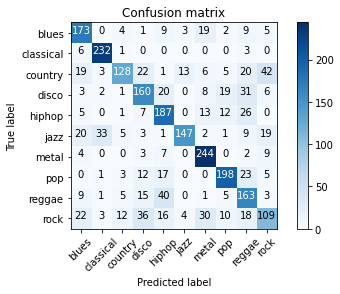

In [ ]:
plot_confusion_matrix(confusion_matrix(y_true=y_test, y_pred=y_pred),
                      classes=label_dict.keys())

##